# Anova

### Analysis of Variance

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
kashti = sns.load_dataset("titanic")
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='sex', ylabel='age'>

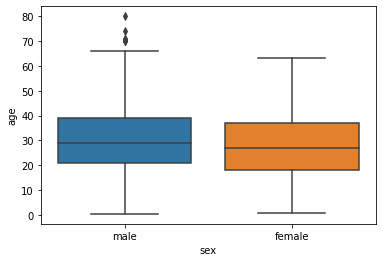

In [14]:
sns.boxplot(x='sex',y='age',data=kashti) # comparision between 2 categorical variable for one continuos

<AxesSubplot:xlabel='class', ylabel='age'>

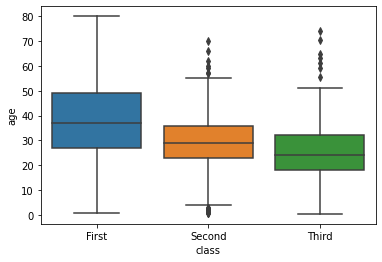

In [15]:
sns.boxplot(x='class',y='age',data=kashti) 
# anova if we have 3 or more groups

In [16]:
#example
phool = sns.load_dataset('iris')

phool.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
phool.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
121,5.6,2.8,4.9,2.0,virginica
130,7.4,2.8,6.1,1.9,virginica
111,6.4,2.7,5.3,1.9,virginica
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor
96,5.7,2.9,4.2,1.3,versicolor
20,5.4,3.4,1.7,0.2,setosa
146,6.3,2.5,5.0,1.9,virginica
60,5.0,2.0,3.5,1.0,versicolor
138,6.0,3.0,4.8,1.8,virginica


In [18]:
phool.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

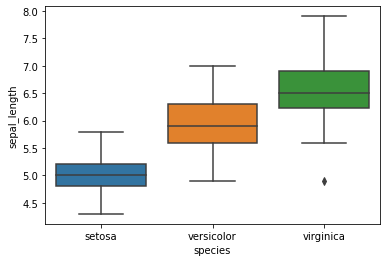

In [19]:
sns.boxplot('species','sepal_length',data=phool)
# or sns.boxplot(x ='species',y= 'sepal_length',data=phool)

In [20]:
pip install statsmodel

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel
You should consider upgrading via the 'C:\Users\Anonymous\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [21]:
# stats

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [22]:
# one way ANOVA

mod = ols('sepal_length ~ species', data=phool).fit() # 1numerical column, 2categorical

aov_table = sm.stats.anova_lm(mod,type=2)
# assignment why type=2 is written
print(aov_table)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


In [23]:
# difference between categories in 2 by 2 using t-test
pair_t = mod.t_test_pairwise('species',method='bonferroni') # sidak
pair_t
pair_t.result_frame
# pvalue-boneferroni adjust and if it is less 0.05 so we reject it

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-bonferroni,reject-bonferroni
versicolor-setosa,0.930,0.102958,9.032819,8.770194e-16,0.726531,1.133469,2.631058e-15,True
virginica-setosa,1.582,0.102958,15.365506,2.214821e-32,1.378531,1.785469,6.644464e-32,True
virginica-versicolor,0.652,0.102958,6.332686,2.765638e-09,0.448531,0.855469,8.296915e-09,True


In [24]:
# pip install pingouin

In [25]:
# tukey hsd test

import pingouin as pg
# dv =  continous varaiable
# between = categorical varaible
aov = pg.anova(data=phool,dv='sepal_length',between='species',detailed=True)
print(aov)
# first calculate anova table and then tukey hsd


    Source         SS   DF         MS           F         p-unc       np2
0  species  63.212133    2  31.606067  119.264502  1.669669e-31  0.618706
1   Within  38.956200  147   0.265008         NaN           NaN       NaN


In [26]:
pt = pg.pairwise_tukey(data=phool,dv='sepal_length',between='species')
print(pt)
# what is T
#if p-tukey is <0.05 so difference is significant and diff is given in table

            A           B  mean(A)  mean(B)   diff        se          T  \
0      setosa  versicolor    5.006    5.936 -0.930  0.102958  -9.032819   
1      setosa   virginica    5.006    6.588 -1.582  0.102958 -15.365506   
2  versicolor   virginica    5.936    6.588 -0.652  0.102958  -6.332686   

        p-tukey    hedges  
0  2.420286e-14 -1.792703  
1  2.153833e-14 -3.049522  
2  8.287554e-09 -1.256820  


In [27]:
# how to read anova table 
# how to see p-tukey significant
# significant difference on plot with line of code